#    Trabalho Final - Feature Engineering

Turma: 7DTSR

Cleber Veiga Galvão - 356846 <br>
Danildo André Amorim dos Santos - 355182 <br>
Victor Marcio Hayee Falcão - 354955 <br>
Lucas Ribeiro Del Poggetto - 355220


## Dataset "Score Crédito" Quantum Finance

A Quantum Finance é uma nova fintech, que está entrando no mercado para concorrer com grandes players e está acompanhando um crescimento de inadimplência entre seus clientes e solicita a consultoria para desenvolver uma análise com base na sua carteira atual de clientes.

- Principais Características do Dataset: 
    - id                  = Identificador Único
    - idade               = Idade em anos
    - sexo                = Sexo              => F = Feminino / M=Masculino
    - estado_civil        = Estado civil      => Solteiro / Casado / Divorciado
    - escola              = Grau de Instrução => ensino fundam = até o ensino fundamental / ensino médio / Graduação / Doutorado
    - Qte_dependentes     = Quantidade de dependentes
    - tempo_ultimoservico = Tempo de trabalho (meses)
    - trabalha            = Trabalha          => 0=Não / 1=Sim
    - vl_salario_mil      = Sálario
    - reg_moradia         = Região da moradia => 1=Segmento geográfico A / 2=Segmento geográfico B / 3=Segmento geográfico C / 4=Segmento geográfico D / 5=Segmento geográfico E / 6=Segmento geográfico F
    - casa_propria        = Casa própria      => 0=Não / 1=Sim
    - vl_imovel_em_mil    = Valor do imóvel (R$)
    - Qte_cartoes         = Quantidade de cartões de crédito
    - Qte_carros          = Quantidade de carros
    - SCORE_CREDITO       = Credit Scorging

## 1 Importação das Bibliotecas Necessárias

In [215]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## 2 Carregar o dataset

In [216]:
Dados = pd.read_csv('Base_ScoreCredito_QuantumFinance.csv', sep=';')

### 2.1 Exploração Inicial dos Dados

In [217]:
Dados.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


### 2.2 Visualizando formatos das variáveis

In [218]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


### 2.3 Convertendo os valores para os tipos corretos para execução do modelo

In [219]:
Dados = Dados.astype({
    'id' : 'int',
    'idade' : 'int',
    'sexo' : 'object',
    'estado_civil' : 'object',
    'escola' : 'object',
    'Qte_dependentes' : 'int',
    'tempo_ultimoservico' : 'int',
    'trabalha' : 'object',
    'vl_salario_mil' : 'float',
    'reg_moradia' : 'object',
    'casa_propria' : 'object',
    'vl_imovel_em_mil' : 'float',
    'Qte_cartoes' : 'int',
    'Qte_carros' : 'int',
    'SCORE_CREDITO' : 'float'
    })

### 2.4 Validando a conversão

In [220]:
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  object 
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  object 
 10  casa_propria         10127 non-null  object 
 11  vl_imovel_em_mil     10127 non-null  float64
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(3), int64(6), object(6)
m

### 2.5 Verificando estatisticas descritivas

In [221]:
Dados.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,1.547447,34.133208,70.209002,208.999111,1.083638,0.623383,469.500364
std,3.690378e+07,8.016814,1.489079,8.221428,55.567032,378.495229,0.333784,0.569796,133.814653
min,7.080821e+08,26.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,7.130368e+08,41.000000,0.000000,30.000000,21.330536,0.000000,1.000000,0.000000,375.000000
50%,7.179264e+08,46.000000,1.000000,34.000000,66.486331,0.000000,1.000000,1.000000,449.600000
75%,7.731435e+08,52.000000,3.000000,39.000000,107.544225,289.000000,1.000000,1.000000,540.900000
max,8.283431e+08,73.000000,5.000000,57.000000,233.301793,1800.000000,4.000000,2.000000,979.650000


## 3 Análise de Fairness (Viés)

### 3.1 Análise de frequências - Sexo

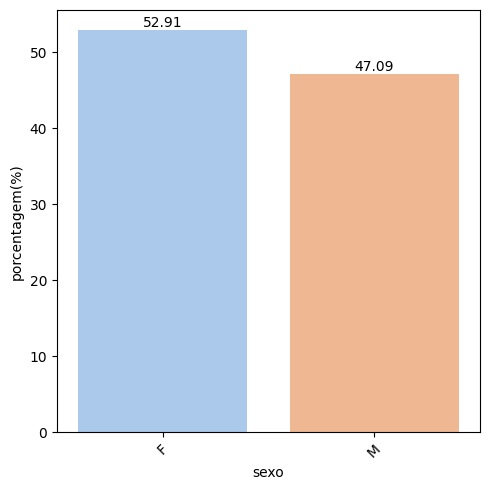

In [222]:
frequencia = Dados['sexo'].value_counts()
percentual = round(Dados['sexo'].value_counts(normalize = True)*100,2)
DadosSexoFreq = pd.DataFrame({'frequencia': frequencia, 'porcentagem(%)': percentual})

ax = sb.barplot(data=DadosSexoFreq, x='sexo', y='porcentagem(%)', hue="sexo", palette='pastel')
for i in ax.containers:
    ax.bar_label(i,)
ax = plt.tick_params(axis='x', labelrotation=45)

plt.show()

### 3.2 Análise de frequências - Idade

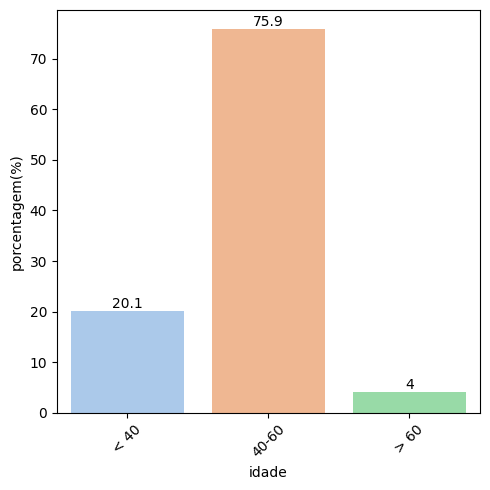

In [223]:
contagemidadetotal = Dados['idade'].count()
contagemidadeacimaigualmedia39 = Dados[(Dados['idade'] < 40)]['idade'].count()
frequenciaidadeacimaigualmedia39 = round(contagemidadeacimaigualmedia39/contagemidadetotal*100,2)

contagemidadeacimaigualmedia40 = Dados[(Dados['idade'] >= 40) & (Dados['idade'] <= 60)]['idade'].count()
frequenciaidadeacimaigualmedia40 = round(contagemidadeacimaigualmedia40/contagemidadetotal*100,2)

contagemidadeacimaigualmedia60 = Dados[(Dados['idade'] > 60)]['idade'].count()
frequenciaidadeacimaigualmedia60 = round(contagemidadeacimaigualmedia60/contagemidadetotal*100,2)

data = {"idade": ["< 40","40-60", "> 60"], "porcentagem(%)": [frequenciaidadeacimaigualmedia39, frequenciaidadeacimaigualmedia40, frequenciaidadeacimaigualmedia60] } # Create the DataFrame
df = pd.DataFrame(data)

ax = sb.barplot(data=df, x='idade', y='porcentagem(%)', hue="idade", palette='pastel')
for i in ax.containers:
    ax.bar_label(i,)
ax = plt.tick_params(axis='x', labelrotation=45)
plt.show()


### 3.3 Análise de frequências - Estado Civil

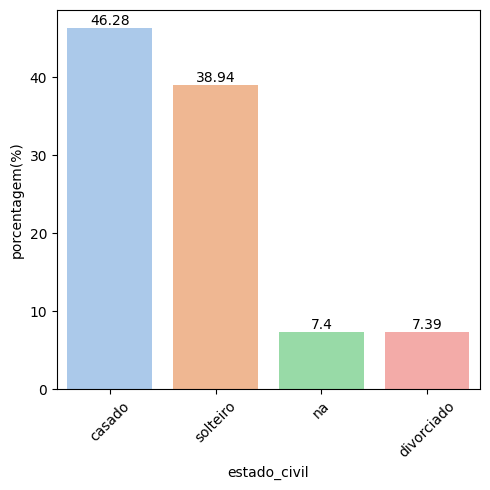

In [224]:
frequencia = Dados['estado_civil'].value_counts()
percentual = Dados['estado_civil'].value_counts(normalize = True)*100
DadosSexoEstCivil = round(pd.DataFrame({'frequencia': frequencia, 'porcentagem(%)': percentual}),2)

ax = sb.barplot(data=DadosSexoEstCivil, x='estado_civil', y='porcentagem(%)', hue="estado_civil", palette='pastel')
for i in ax.containers:
    ax.bar_label(i,)
ax = plt.tick_params(axis='x', labelrotation=45)
plt.show()



### 3.4 Análise de frequências - Escolaridade

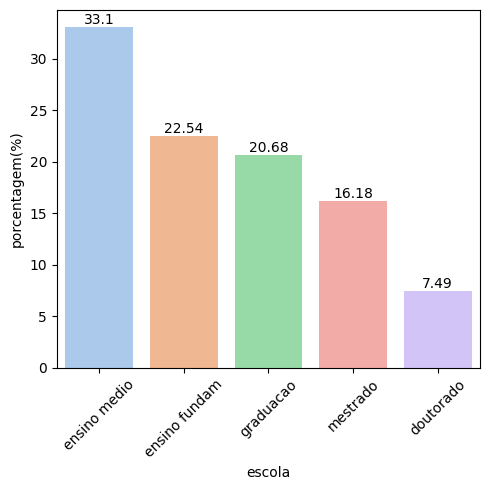

In [225]:
frequencia = Dados['escola'].value_counts()
percentual = round(Dados['escola'].value_counts(normalize = True)*100,2)
DadosEscola = round(pd.DataFrame({'frequencia': frequencia, 'porcentagem(%)': percentual}),2)


ax = sb.barplot(data=DadosEscola, x='escola', y='porcentagem(%)', hue="escola", palette='pastel')
for i in ax.containers:
    ax.bar_label(i,)
ax = plt.tick_params(axis='x', labelrotation=45)
plt.show()


### 3.4 Análise de frequências - Média Salarial
#### Qual % da base que tem o salarial igual ou acima da média de 70.000?

In [226]:
contagemsalariototal = Dados['vl_salario_mil'].count()
contagemsalarioacimaigualmedia = Dados[(Dados['vl_salario_mil'] >= 70)]['vl_salario_mil'].count()
frequenciasalarioacimaigualmedia = contagemsalarioacimaigualmedia/contagemsalariototal*100
print(str(round(100-frequenciasalarioacimaigualmedia,2)) + '%')


54.56%


### 3.5 Análise de Distribuição - Histograma

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'Qte_dependentes'}>,
        <Axes: title={'center': 'tempo_ultimoservico'}>],
       [<Axes: title={'center': 'vl_salario_mil'}>,
        <Axes: title={'center': 'vl_imovel_em_mil'}>,
        <Axes: title={'center': 'Qte_cartoes'}>],
       [<Axes: title={'center': 'Qte_carros'}>,
        <Axes: title={'center': 'SCORE_CREDITO'}>, <Axes: >]],
      dtype=object)

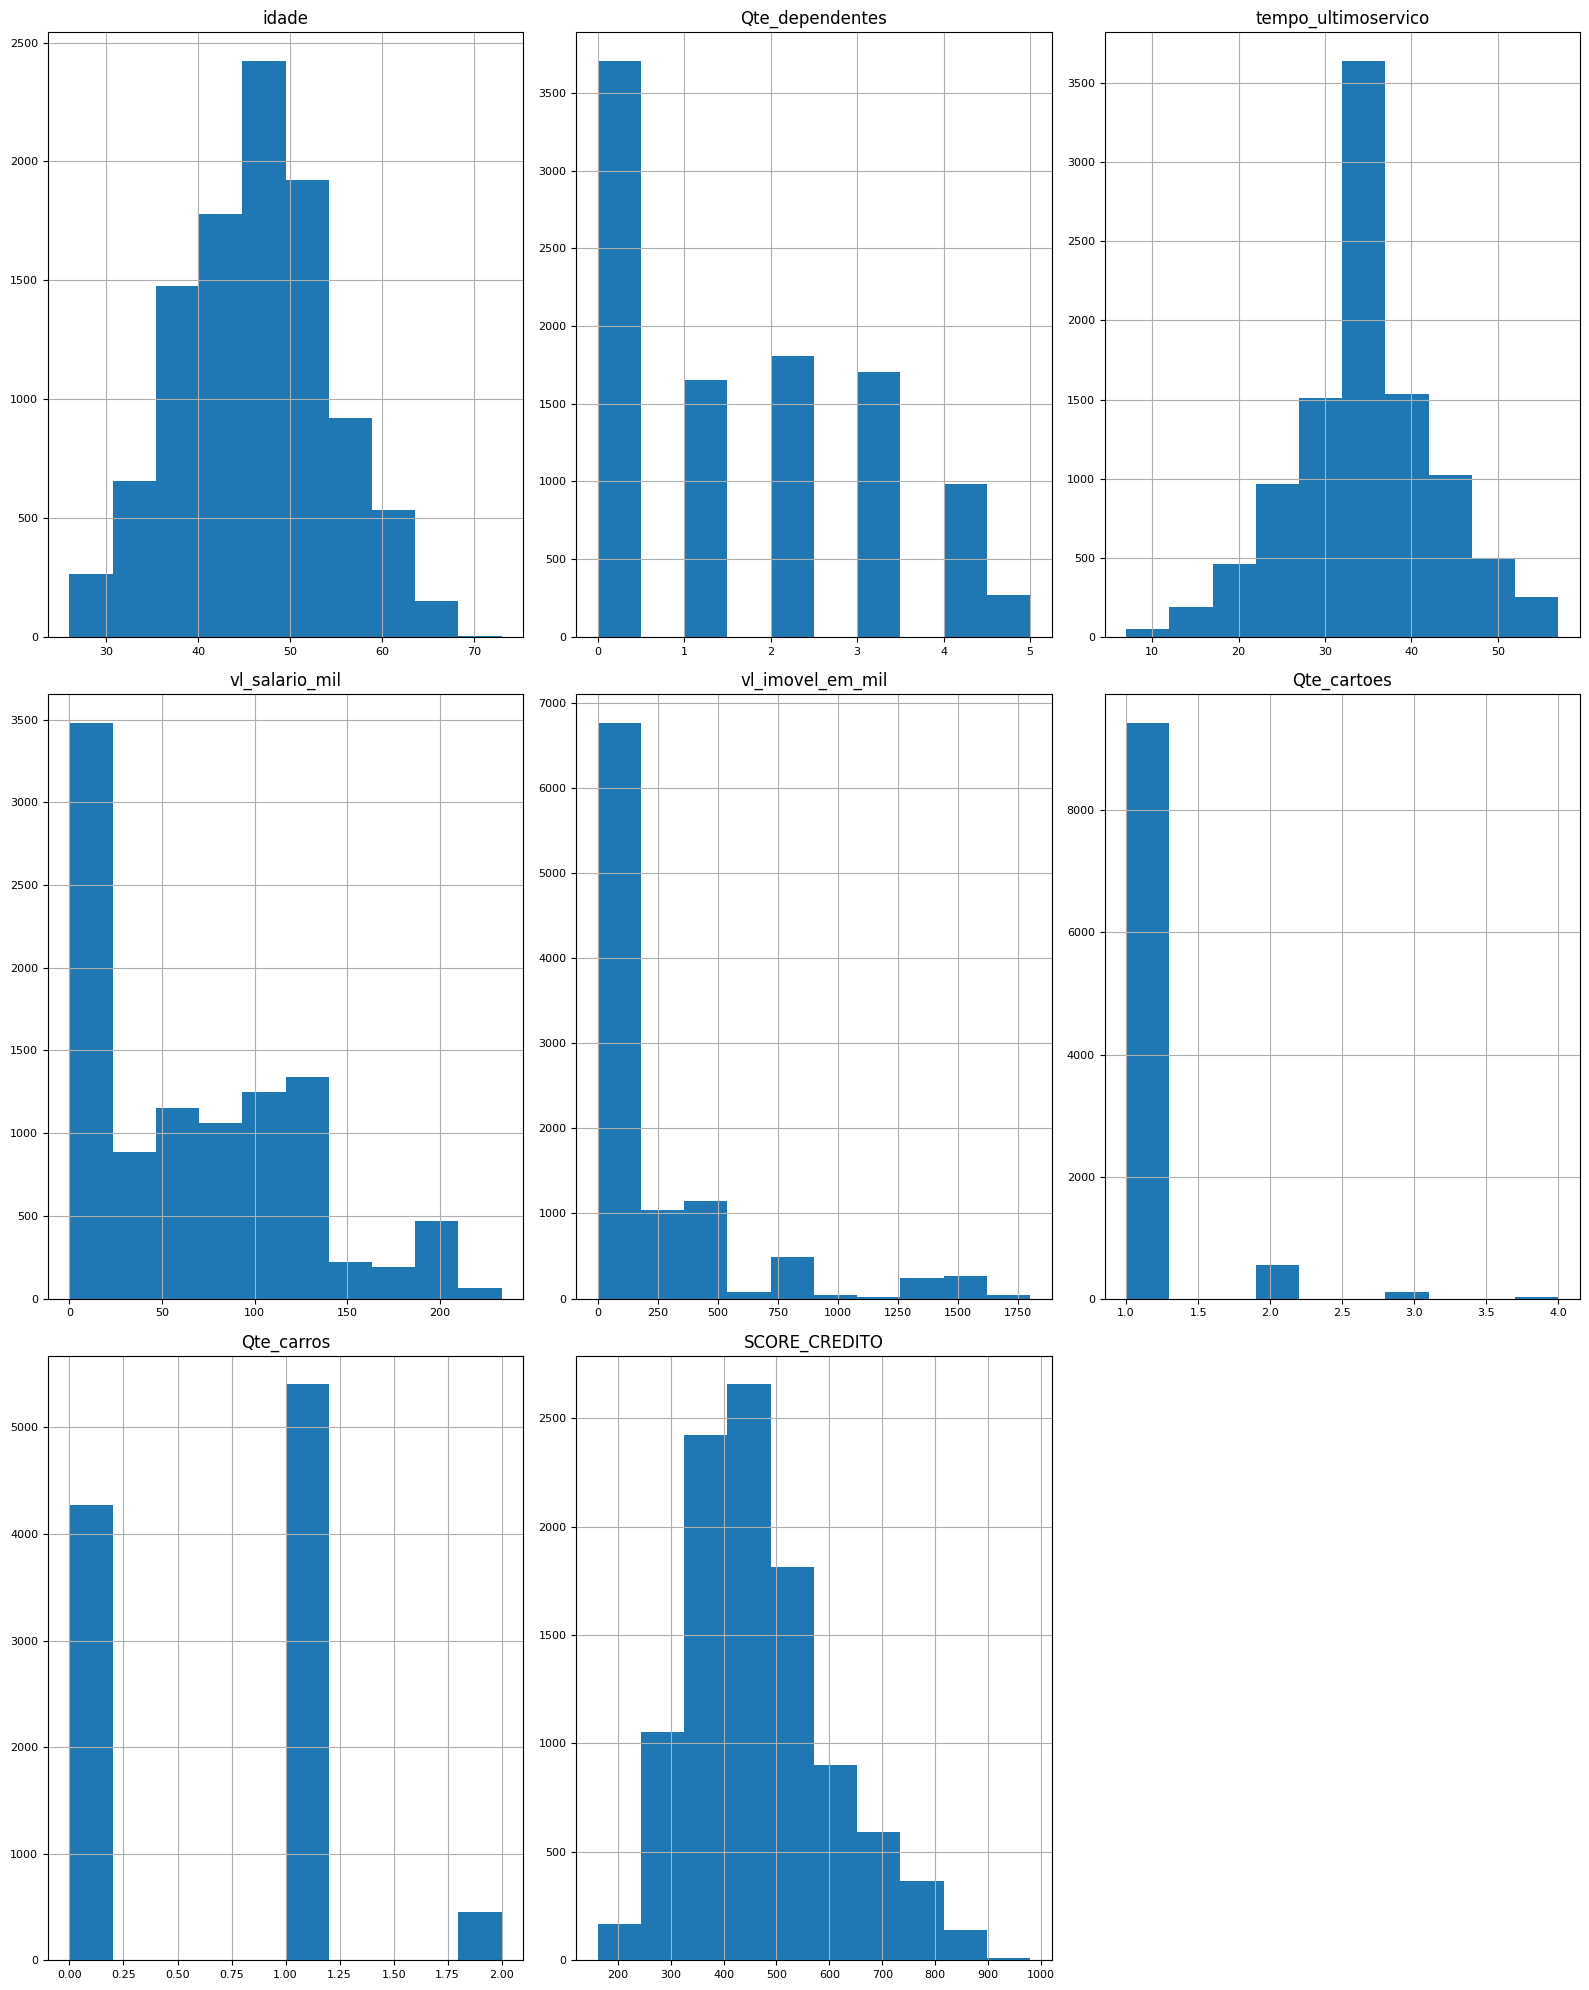

In [227]:
# plotagem do histograma para cada variável numérica
Dados.drop("id",axis=1).hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

### 3.6 Análise de Distribuição - Faixa de Valores

C:\Users\galvaocv\AppData\Local\Temp\ipykernel_23720\844121180.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  valoresfaixa = pd.value_counts(pd.cut(Dados['vl_imovel_em_mil'], bins=[0,500, 1000, 1500, 2000], labels=labels_faixa))


<Axes: title={'center': 'Análise for Faixa de Valor - Imóvel'}, xlabel='vl_imovel_em_mil'>

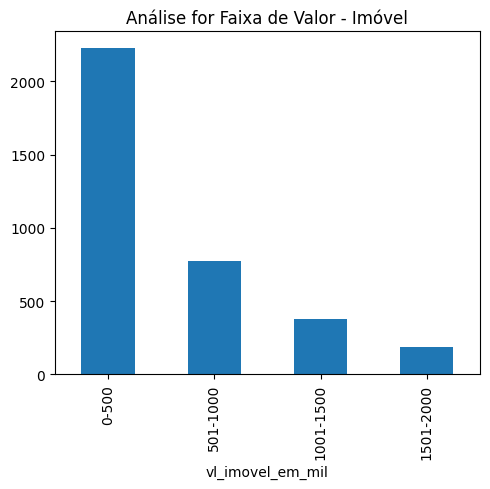

In [228]:
#por valor do imóvel
labels_faixa = ['0-500', '501-1000','1001-1500','1501-2000']
valoresfaixa = pd.value_counts(pd.cut(Dados['vl_imovel_em_mil'], bins=[0,500, 1000, 1500, 2000], labels=labels_faixa))

valoresfaixa.plot.bar(title="Análise for Faixa de Valor - Imóvel")

### 3.7 Análise de Distribuição - BoxPlot

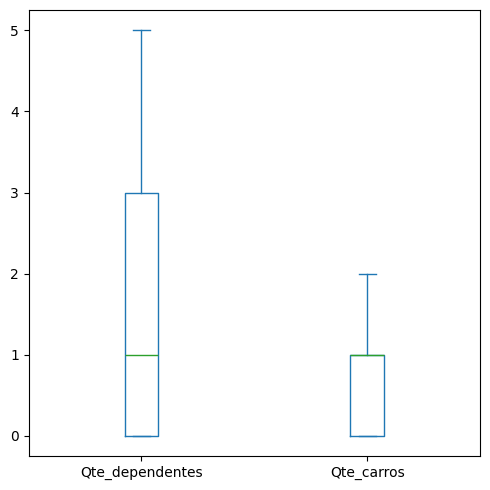

In [229]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

ax = Dados[['Qte_dependentes', 'Qte_carros']].plot(kind='box')

plt.show()

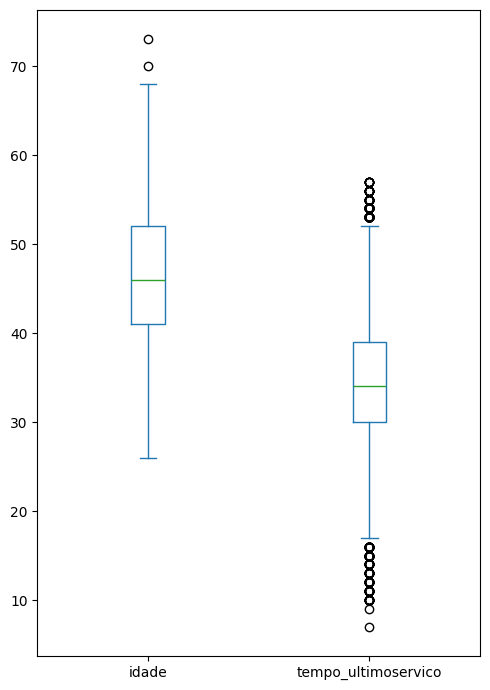

In [230]:
plt.rcParams["figure.figsize"] = [5, 7]
plt.rcParams["figure.autolayout"] = True

ax = Dados[['idade', 'tempo_ultimoservico']].plot(kind='box')

plt.show()

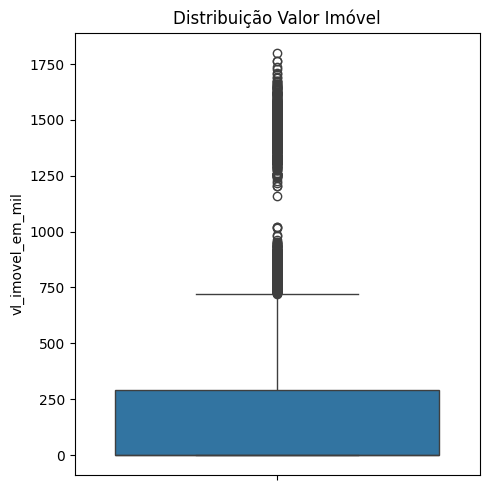

In [231]:
plt.rcParams['figure.figsize']=(5,5)
sb.boxplot(Dados['vl_imovel_em_mil'], vert=True)
plt.title('Distribuição Valor Imóvel')
plt.show()

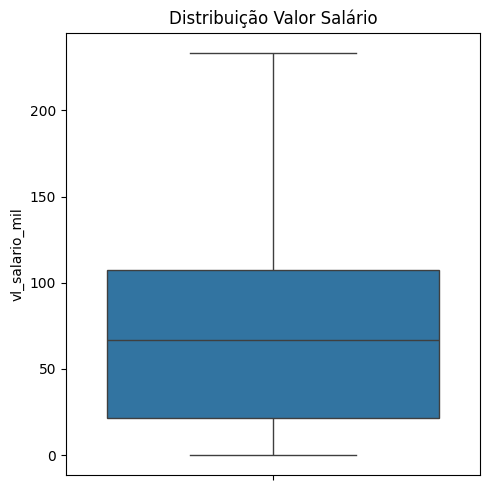

In [232]:
plt.rcParams['figure.figsize']=(5,5)
sb.boxplot(Dados['vl_salario_mil'], vert=True)
plt.title('Distribuição Valor Salário')
plt.show()

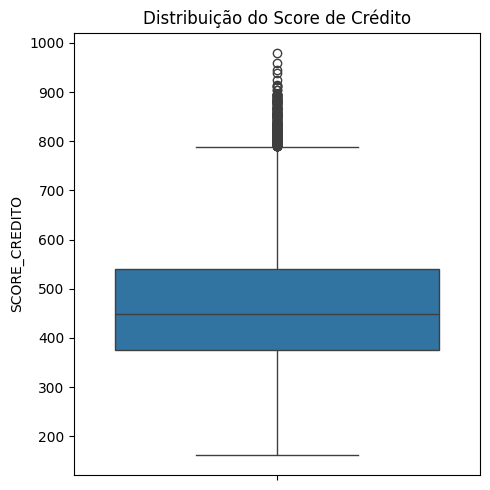

In [233]:
plt.rcParams['figure.figsize']=(5,5)
sb.boxplot(Dados, y='SCORE_CREDITO')
plt.title('Distribuição do Score de Crédito')
plt.show()

### 3.8 IQR - Verificar outliers

In [234]:
#quantos % da base está entre a média e +/- 1 desvio
np.mean(Dados['SCORE_CREDITO'])-(1*np.std(Dados['SCORE_CREDITO']))

np.float64(335.6923182509308)

In [235]:
#quantos % da base está entre a média e +/- 1 desvio
np.mean(Dados['SCORE_CREDITO'])+(1*np.std(Dados['SCORE_CREDITO']))

np.float64(603.3084095065494)

In [236]:
# filtrando a informação para cálculo
aux = Dados[(Dados['SCORE_CREDITO'] >= 335.69)  &  (Dados['SCORE_CREDITO'] <= 603.30)]
aux.describe()

,id,idade,Qte_dependentes,tempo_ultimoservico,vl_salario_mil,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,7.110000e+03,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000,7110.000000
mean,7.393961e+08,47.014909,1.556118,34.448101,65.746719,131.612518,1.047679,0.641491,453.002355
std,3.690105e+07,7.668494,1.492189,7.476642,52.212252,228.012345,0.245608,0.553656,69.573478
min,7.080846e+08,26.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,335.700000
25%,7.131838e+08,42.000000,0.000000,31.000000,21.518179,0.000000,1.000000,0.000000,395.000000
50%,7.179821e+08,47.000000,1.000000,34.000000,65.230042,0.000000,1.000000,1.000000,447.300000
75%,7.731022e+08,52.000000,3.000000,39.000000,100.247704,235.000000,1.000000,1.000000,507.000000
max,8.283431e+08,73.000000,5.000000,56.000000,211.184116,1706.000000,4.000000,2.000000,603.000000


In [237]:
# Qual a porcentagem de observações entre a média e um desvio padrão
perc_1desvio = round(len(aux)/len(Dados)*100,2)
print('Percentagem de observações entre a média e 1 desvio para cima e para baixo', perc_1desvio)

Percentagem de observações entre a média e 1 desvio para cima e para baixo 70.21


In [238]:
#coeficiente de variacao
desc = Dados.describe().T

desc['CV'] = desc['std']/desc['mean']*100

In [239]:
desc.round(2)

,count,mean,std,min,25%,50%,75%,max,CV
id,10127.0,7.391776e+08,36903783.45,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08,4.99
idade,10127.0,4.633000e+01,8.02,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01,17.31
Qte_dependentes,10127.0,1.550000e+00,1.49,0.0,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,96.23
tempo_ultimoservico,10127.0,3.413000e+01,8.22,7.0,3.000000e+01,3.400000e+01,3.900000e+01,5.700000e+01,24.09
vl_salario_mil,10127.0,7.021000e+01,55.57,0.0,2.133000e+01,6.649000e+01,1.075400e+02,2.333000e+02,79.15
vl_imovel_em_mil,10127.0,2.090000e+02,378.50,0.0,0.000000e+00,0.000000e+00,2.890000e+02,1.800000e+03,181.10
Qte_cartoes,10127.0,1.080000e+00,0.33,1.0,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,30.80
Qte_carros,10127.0,6.200000e-01,0.57,0.0,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,91.40
SCORE_CREDITO,10127.0,4.695000e+02,133.81,162.0,3.750000e+02,4.496000e+02,5.409000e+02,9.796500e+02,28.50


## Preparação do Modelo

### Normalizar Variáveis
#### Fazemos a normalização de variáveis para diminuir o 'range' entre os valores e melhor o algorítimo de cálculo

In [240]:
#normalizar salario
Dados['salario_norm']=(Dados['vl_salario_mil'] - min(Dados['vl_salario_mil'])) / (max(Dados['vl_salario_mil']) - min(Dados['vl_salario_mil']))

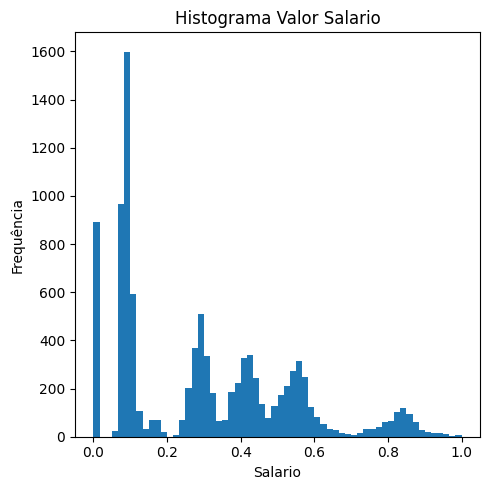

In [241]:
# Histograma da variável salario normalizado
plt.hist(Dados['salario_norm'], bins=60)
plt.ylabel('Frequência')
plt.xlabel('Salario')
plt.title('Histograma Valor Salario');

In [242]:
#normalizar valor imovel
Dados['valorimovel_norm']=(Dados['vl_imovel_em_mil'] - min(Dados['vl_imovel_em_mil'])) /( max(Dados['vl_imovel_em_mil']) - min(Dados['vl_imovel_em_mil']))

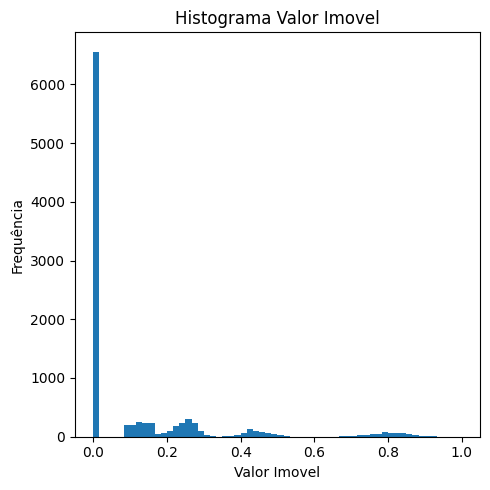

In [243]:
# Histograma da variável valor imovel normalizado
plt.hist(Dados['valorimovel_norm'], bins=60)
plt.ylabel('Frequência')
plt.xlabel('Valor Imovel')
plt.title('Histograma Valor Imovel');